In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve



df = pd.read_csv('diabetes.csv')

print(df.head())
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

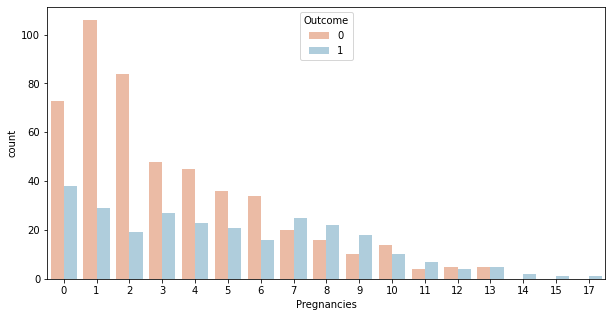

In [4]:
# plot the Pregnancies
plt.figure(figsize = (10,5))
sns.countplot(x='Pregnancies', hue='Outcome', data=df, palette='RdBu')
plt.show()

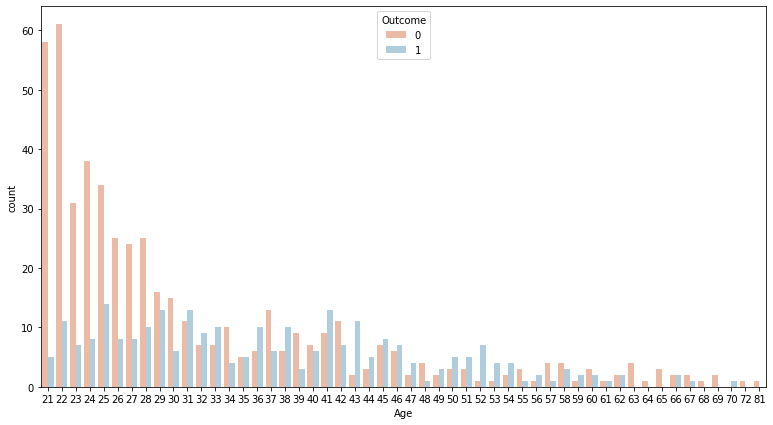

In [5]:
# plot Age
plt.figure(figsize = (13,7))
sns.countplot(x='Age', hue='Outcome', data=df, palette='RdBu')
plt.show()

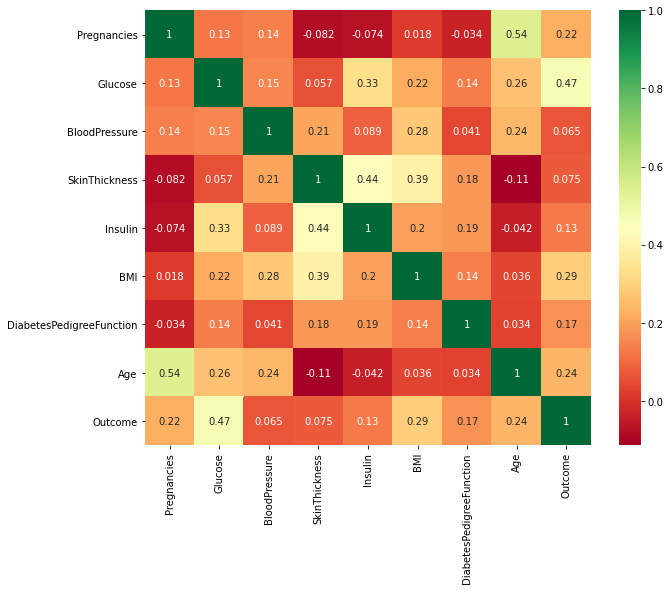

In [6]:
%matplotlib inline

plt.figure(figsize = (10,8))
corr = df.corr()
sns.heatmap(corr, annot = True,cmap ='RdYlGn')
plt.show()

<Figure size 1440x720 with 0 Axes>

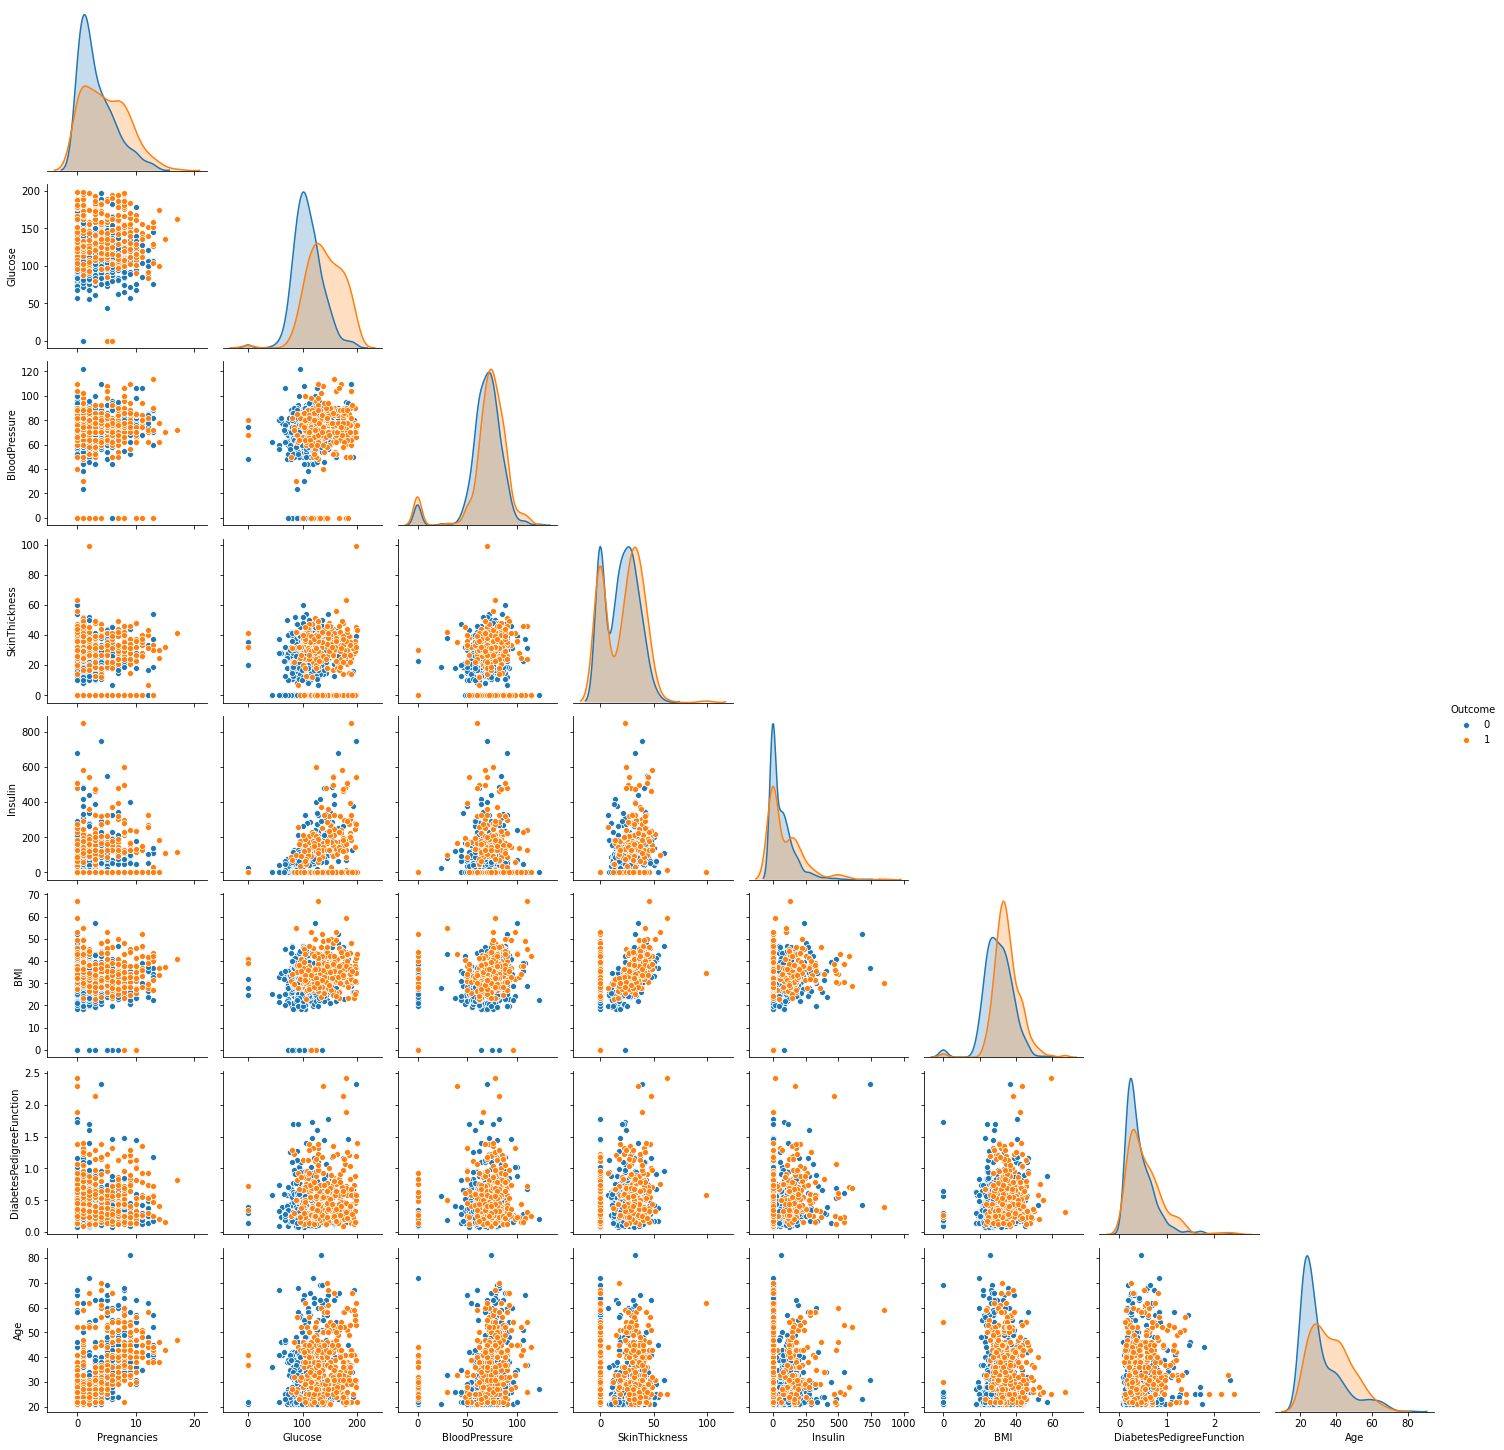

In [7]:
%matplotlib inline
plt.figure(figsize = (20, 10))
g = sns.pairplot(data = df, hue = "Outcome", corner = True)

In [8]:
stc_X = StandardScaler()

X = pd.DataFrame(stc_X.fit_transform(df.drop(['Outcome'], axis = 1 )),
                columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.values

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [9]:
# Check the mean of the scaled features

print(X.mean(axis = 0))

Pregnancies                 2.544261e-17
Glucose                     3.614007e-18
BloodPressure              -1.327244e-17
SkinThickness               7.994184e-17
Insulin                    -3.556183e-17
BMI                         2.295979e-16
DiabetesPedigreeFunction    2.398978e-16
Age                         1.857600e-16
dtype: float64


In [10]:
y = df['Outcome'].values

In [11]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [12]:
# train & test data - test size 20% and training is 80%
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
#predit the X values
y_pred = knn.predict(X_test)

In [15]:
#score for test data
print(knn.score(X_test,y_test))

0.7987012987012987


In [16]:
# score for the train data
print(knn.score(X_train,y_train))

0.8013029315960912


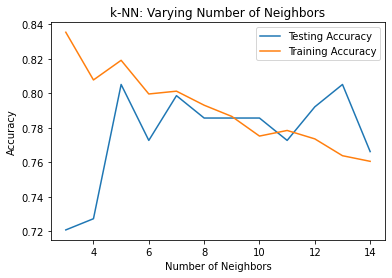

In [17]:
# View the best possible k-value

neighbors = np.arange(3, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit  to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
   
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


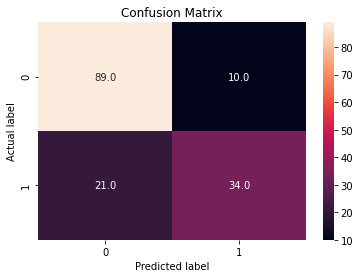

In [18]:
#Plot the Cofusion Matrix
cfn_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cfn_matrix, annot = True, fmt = ".1f")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
print(cfn_matrix.sum(axis=0))

print(np.diag(cfn_matrix))

[110  44]
[89 34]


In [20]:
np.diag(cfn_matrix)

array([89, 34], dtype=int64)

In [21]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cfn_matrix.sum(axis=0) - np.diag(cfn_matrix)
FN = cfn_matrix.sum(axis=1) - np.diag(cfn_matrix)
TP = np.diag(cfn_matrix)
TN = cfn_matrix.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate (Recall) is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)
print('')
print(classification_report(y_test,y_pred))

The True Positive Rate (Recall) is: [0.8989899  0.61818182]
The Precision is: [0.80909091 0.77272727]
The False positive rate is: [0.38181818 0.1010101 ]
The False Negative Rate is:  [0.1010101  0.38181818]

The average TPR is: 0.7585858585858586
The average Precision is: 0.7909090909090909
The average False positive rate is: 0.24141414141414141
The average False Negative Rate is: 0.24141414141414141

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



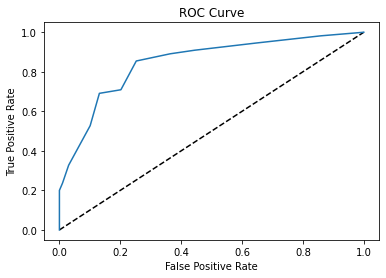

In [22]:
# predicted probabilities
y_pred_prob = knn.predict_proba(X_test)[:,1]

# ROC curve values: fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [23]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.8471074380165289